## Polytope Climate-DT Feature Extraction Vertical Profile example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots.


Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [1]:
%%capture cap
%run ../desp-authentication.py

Exception: Invalid username or password.

This will generate a token that can then be used by earthkit and polytope.

In [2]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install cf-units         (Optional for unit conversion in maps)

In [3]:
import earthkit.data
import earthkit.regrid
from earthkit.plots.interactive import Chart
from polytope.api import Client

In [4]:
client = Client(
    address="polytope.lumi.apps.dte.destination-earth.eu")


request = {
        "activity": "scenariomip",
        "class": "d1",
        "dataset": "climate-dt",
        "experiment": "ssp3-7.0",
        "generation": "1",
        "levtype": "pl",
        "date": "20210101",
        "model": "ifs-nemo",
        "expver": "0001",
        "param": "131",
        "realization": "1",
        "resolution": "high",
        "stream": "clte",
        "type": "fc",
        "time": "0000",
        "levelist": "1/to/1000",
        "feature": {
            "type": "verticalprofile",
            "points": [[38.9, -9.1]],
        },
    }

file = client.retrieve("destination-earth", request, "data/climate-dt-earthkit-fe-verticalprofile.grib") 

2025-07-20 12:26:57 - INFO - Key read from /Users/maes/.polytopeapirc
2025-07-20 12:26:57 - INFO - Sending request...
{'request': 'activity: scenariomip\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20210101'\n"
            'experiment: ssp3-7.0\n'
            "expver: '0001'\n"
            'feature:\n'
            '  points:\n'
            '  - - 38.9\n'
            '    - -9.1\n'
            '  type: verticalprofile\n'
            "generation: '1'\n"
            'levelist: 1/to/1000\n'
            'levtype: pl\n'
            'model: ifs-nemo\n'
            "param: '131'\n"
            "realization: '1'\n"
            'resolution: high\n'
            'stream: clte\n'
            "time: '0000'\n"
            'type: fc\n',
 'verb': 'retrieve'}
2025-07-20 12:26:57 - INFO - Polytope user key found in session cache for user maes


2025-07-20 12:26:59 - INFO - Request accepted. Please poll ./d472dca4-3677-4173-824e-3b327f6fc42e for status
2025-07-20 12:26:59 - INFO - Polytope user key found in session cache for user maes
2025-07-20 12:26:59 - INFO - Checking request status (d472dca4-3677-4173-824e-3b327f6fc42e)...
2025-07-20 12:26:59 - INFO - The current status of the request is 'queued'
2025-07-20 12:27:00 - INFO - The current status of the request is 'processing'
2025-07-20 12:27:04 - INFO - The current status of the request is 'processed'
2025-07-20 12:27:04 - INFO - Starting data download (application/prs.coverage+json)...
2025-07-20 12:27:04 - INFO - Saving data into /Users/maes/Documents/polytope-examples/climate-dt/data/climate-dt-earthkit-fe-verticalprofile.grib...
2025-07-20 12:27:04 - INFO - Data downloaded successfully
2025-07-20 12:27:04 - INFO - Download rate 119.9KiB/s
2025-07-20 12:27:04 - INFO - Data saved successfully into /Users/maes/Documents/polytope-examples/climate-dt/data/climate-dt-earthki

In [5]:
data = earthkit.data.from_source("file", "data/climate-dt-earthkit-fe-verticalprofile.grib") 

In [6]:
data._json()

{'type': 'CoverageCollection',
 'domainType': 'VerticalProfile',
 'coverages': [{'mars:metadata': {'activity': 'scenariomip',
    'class': 'd1',
    'dataset': 'climate-dt',
    'Forecast date': '2021-01-01T00:00:00Z',
    'experiment': 'ssp3-7.0',
    'expver': '0001',
    'generation': '1',
    'levelist': 1,
    'levtype': 'pl',
    'model': 'ifs-nemo',
    'realization': '1',
    'resolution': 'high',
    'stream': 'clte',
    'type': 'fc',
    'number': 0,
    'step': 0},
   'type': 'Coverage',
   'domain': {'type': 'Domain',
    'axes': {'latitude': {'values': [38.873582658567]},
     'longitude': {'values': [350.9033203125]},
     'levelist': {'values': [1,
       5,
       10,
       20,
       30,
       50,
       70,
       100,
       150,
       200,
       250,
       300,
       400,
       500,
       600,
       700,
       850,
       925,
       1000]},
     't': {'values': ['2021-01-01T00:00:00Z']}}},
   'ranges': {'u': {'type': 'NdArray',
     'dataType': 'float',


In [7]:
# Convert data to xarray
da = data.to_xarray()

In [8]:
da

<xarray.Dataset> Size: 416B
Dimensions:    (latitude: 1, longitude: 1, number: 1, datetime: 1, time: 1,
                levelist: 19)
Coordinates:
  * latitude   (latitude) float64 8B 38.87
  * longitude  (longitude) float64 8B 350.9
  * number     (number) int64 8B 0
  * datetime   (datetime) <U20 80B '2021-01-01T00:00:00Z'
  * time       (time) int64 8B 0
  * levelist   (levelist) int64 152B 1 5 10 20 30 50 ... 600 700 850 925 1000
Data variables:
    u          (latitude, longitude, number, datetime, time, levelist) float64 152B ...
Attributes: (12/15)
    activity:       scenariomip
    class:          d1
    dataset:        climate-dt
    Forecast date:  2021-01-01T00:00:00Z
    experiment:     ssp3-7.0
    expver:         0001
    ...             ...
    model:          ifs-nemo
    realization:    1
    resolution:     high
    stream:         clte
    type:           fc
    number:         0

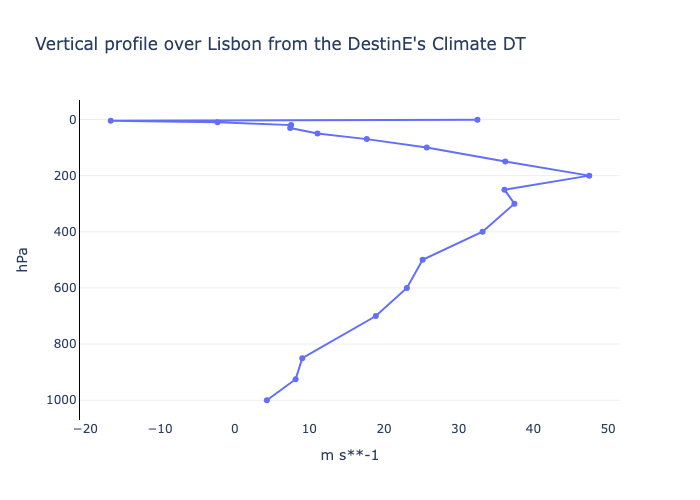

In [9]:
chart = Chart()
fig = chart.fig
fig['layout']['yaxis']['autorange'] = "reversed"
chart.line(da, y="levelist")
chart.fig.update_layout(yaxis={"title": "hPa"})
chart.title("Vertical profile over Lisbon from the DestinE's Climate DT")
chart.show("png") # Replace with chart.show() in an interactive session!